In [1]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ds = pd.read_csv('audible_uncleaned.csv')

In [3]:
ds.head()

,name,author,narrator,time,releasedate,language,stars,price
0,Geronimo Stilton #11 & #12,Writtenby:GeronimoStilton,Narratedby:BillLobely,2 hrs and 20 mins,04-08-08,English,5 out of 5 stars34 ratings,468.00
1,The Burning Maze,Writtenby:RickRiordan,Narratedby:RobbieDaymond,13 hrs and 8 mins,01-05-18,English,4.5 out of 5 stars41 ratings,820.00
2,The Deep End,Writtenby:JeffKinney,Narratedby:DanRussell,2 hrs and 3 mins,06-11-20,English,4.5 out of 5 stars38 ratings,410.00
3,Daughter of the Deep,Writtenby:RickRiordan,Narratedby:SoneelaNankani,11 hrs and 16 mins,05-10-21,English,4.5 out of 5 stars12 ratings,615.00
4,"The Lightning Thief: Percy Jackson, Book 1",Writtenby:RickRiordan,Narratedby:JesseBernstein,10 hrs,13-01-10,English,4.5 out of 5 stars181 ratings,820.00


In [4]:
ds.shape, ds.size

((87489, 8), 699912)

In [5]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87489 entries, 0 to 87488
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         87489 non-null  object
 1   author       87489 non-null  object
 2   narrator     87489 non-null  object
 3   time         87489 non-null  object
 4   releasedate  87489 non-null  object
 5   language     87489 non-null  object
 6   stars        87489 non-null  object
 7   price        87489 non-null  object
dtypes: object(8)
memory usage: 5.3+ MB


In [6]:
ds.describe(include='all')

,name,author,narrator,time,releasedate,language,stars,price
count,87489,87489,87489,87489,87489,87489,87489,87489
unique,82767,48374,29717,2284,5058,36,665,1011
top,The Art of War,"Writtenby:矢島雅弘,石橋遊",Narratedby:anonymous,2 mins,16-05-18,English,Not rated yet,586.00
freq,20,874,1034,372,773,61884,72417,5533


In [7]:
ds.isnull().sum()

name           0
author         0
narrator       0
time           0
releasedate    0
language       0
stars          0
price          0
dtype: int64

In [8]:
ds['author'] = ds['author'].str.replace('Writtenby:', '')
ds['narrator'] = ds['narrator'].str.replace('Narratedby:', '')

In [9]:
ds.head()

,name,author,narrator,time,releasedate,language,stars,price
0,Geronimo Stilton #11 & #12,GeronimoStilton,BillLobely,2 hrs and 20 mins,04-08-08,English,5 out of 5 stars34 ratings,468.00
1,The Burning Maze,RickRiordan,RobbieDaymond,13 hrs and 8 mins,01-05-18,English,4.5 out of 5 stars41 ratings,820.00
2,The Deep End,JeffKinney,DanRussell,2 hrs and 3 mins,06-11-20,English,4.5 out of 5 stars38 ratings,410.00
3,Daughter of the Deep,RickRiordan,SoneelaNankani,11 hrs and 16 mins,05-10-21,English,4.5 out of 5 stars12 ratings,615.00
4,"The Lightning Thief: Percy Jackson, Book 1",RickRiordan,JesseBernstein,10 hrs,13-01-10,English,4.5 out of 5 stars181 ratings,820.00


In [10]:
ex_author = ds['author'].str.extract(pat = '([A-Z][a-z]+)([A-Z][a-z]+)')
ex_narr = ds['narrator'].str.extract(pat = '([A-Z][a-z]+)([A-Z][a-z]+)')

In [11]:
ds['author'] = np.where(
    ex_author[0].notna(),
    ex_author[0] + ' ' + ex_author[1], 
    ds['author']
)

In [12]:
ds['narrator'] = np.where(
    ex_narr[0].notna(),
    ex_narr[0] + ' ' + ex_narr[1], 
    ds['narrator']
)

In [13]:
ds.head()

,name,author,narrator,time,releasedate,language,stars,price
0,Geronimo Stilton #11 & #12,Geronimo Stilton,Bill Lobely,2 hrs and 20 mins,04-08-08,English,5 out of 5 stars34 ratings,468.00
1,The Burning Maze,Rick Riordan,Robbie Daymond,13 hrs and 8 mins,01-05-18,English,4.5 out of 5 stars41 ratings,820.00
2,The Deep End,Jeff Kinney,Dan Russell,2 hrs and 3 mins,06-11-20,English,4.5 out of 5 stars38 ratings,410.00
3,Daughter of the Deep,Rick Riordan,Soneela Nankani,11 hrs and 16 mins,05-10-21,English,4.5 out of 5 stars12 ratings,615.00
4,"The Lightning Thief: Percy Jackson, Book 1",Rick Riordan,Jesse Bernstein,10 hrs,13-01-10,English,4.5 out of 5 stars181 ratings,820.00


In [14]:
stars_column = ds['stars'].values

In [15]:
stars = []

for text in stars_column:
    result = re.match(r"^\d+(\.\d+)?", text)
    if result:
        stars.append(result.group())
    else:
        stars.append('no ratings')

In [16]:
ds['stars'] = stars

In [17]:
ratings = []

for text in stars_column:
    result = re.search(r"stars(\d+)", text)
    if result:
        ratings.append(result.group(1))
    else:
        ratings.append(0)

In [18]:
ds['ratings'] = ratings

In [19]:
ds.head()

,name,author,narrator,time,releasedate,language,stars,price,ratings
0,Geronimo Stilton #11 & #12,Geronimo Stilton,Bill Lobely,2 hrs and 20 mins,04-08-08,English,5,468.00,34
1,The Burning Maze,Rick Riordan,Robbie Daymond,13 hrs and 8 mins,01-05-18,English,4.5,820.00,41
2,The Deep End,Jeff Kinney,Dan Russell,2 hrs and 3 mins,06-11-20,English,4.5,410.00,38
3,Daughter of the Deep,Rick Riordan,Soneela Nankani,11 hrs and 16 mins,05-10-21,English,4.5,615.00,12
4,"The Lightning Thief: Percy Jackson, Book 1",Rick Riordan,Jesse Bernstein,10 hrs,13-01-10,English,4.5,820.00,181


In [20]:
ds['time'].unique()[:20]

array(['2 hrs and 20 mins', '13 hrs and 8 mins', '2 hrs and 3 mins',
       '11 hrs and 16 mins', '10 hrs', '10 hrs and 35 mins',
       '2 hrs and 23 mins', '12 hrs and 32 mins', '10 hrs and 56 mins',
       '13 hrs and 22 mins', '8 hrs and 48 mins', '5 hrs and 23 mins',
       '6 hrs and 1 min', '12 hrs and 58 mins', '11 hrs and 55 mins',
       '2 hrs and 25 mins', '5 hrs and 4 mins', '14 hrs and 41 mins',
       '10 hrs and 18 mins', '16 hrs and 42 mins'], dtype=object)

In [21]:
def time_to_minutes(time_str):
    hours_match = re.search(r"(\d+)\s*hrs?", time_str)
    minutes_match = re.search(r"(\d+)\s*mins?", time_str)
    
    hours = int(hours_match.group(1)) if hours_match else 0
    minutes = int(minutes_match.group(1)) if minutes_match else 0
    
    return hours * 60 + minutes

In [22]:
ds['time'] = [time_to_minutes(st) for st in ds['time'].values]

In [23]:
ds.head()

,name,author,narrator,time,releasedate,language,stars,price,ratings
0,Geronimo Stilton #11 & #12,Geronimo Stilton,Bill Lobely,140,04-08-08,English,5,468.00,34
1,The Burning Maze,Rick Riordan,Robbie Daymond,788,01-05-18,English,4.5,820.00,41
2,The Deep End,Jeff Kinney,Dan Russell,123,06-11-20,English,4.5,410.00,38
3,Daughter of the Deep,Rick Riordan,Soneela Nankani,676,05-10-21,English,4.5,615.00,12
4,"The Lightning Thief: Percy Jackson, Book 1",Rick Riordan,Jesse Bernstein,600,13-01-10,English,4.5,820.00,181


In [24]:
ds['releasedate'] = pd.to_datetime(ds['releasedate'], format='mixed')

In [25]:
ds.describe(include = 'all')

,name,author,narrator,time,releasedate,language,stars,price,ratings
count,87489,87489,87489,87489.000000,87489,87489,87489,87489,87489.0
unique,82767,44255,23968,NaN,NaN,36,10,1011,347.0
top,The Art of War,"矢島雅弘,石橋遊",anonymous,NaN,NaN,English,no ratings,586.00,0.0
freq,20,874,1034,NaN,NaN,61884,72417,5533,72417.0
mean,NaN,NaN,NaN,417.497663,2018-06-22 01:35:29.780886528,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,1.000000,1998-12-27 00:00:00,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,142.000000,2016-08-30 00:00:00,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,386.000000,2020-01-30 00:00:00,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,584.000000,2021-08-04 00:00:00,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,8595.000000,2025-11-14 00:00:00,NaN,NaN,NaN,NaN


In [26]:
ds = ds[ds['releasedate'].dt.year < 2025]

In [28]:
ds.head()

,name,author,narrator,time,releasedate,language,stars,price,ratings
0,Geronimo Stilton #11 & #12,Geronimo Stilton,Bill Lobely,140,2008-04-08,English,5,468.00,34
1,The Burning Maze,Rick Riordan,Robbie Daymond,788,2018-01-05,English,4.5,820.00,41
2,The Deep End,Jeff Kinney,Dan Russell,123,2020-06-11,English,4.5,410.00,38
3,Daughter of the Deep,Rick Riordan,Soneela Nankani,676,2021-05-10,English,4.5,615.00,12
4,"The Lightning Thief: Percy Jackson, Book 1",Rick Riordan,Jesse Bernstein,600,2010-01-13,English,4.5,820.00,181


In [37]:
ds.dtypes

name                   object
author                 object
narrator               object
time                    int64
releasedate    datetime64[ns]
language               object
stars                  object
price                  object
ratings                object
dtype: object

In [39]:
ds['price'] = ds['price'].str.replace(',', '')
ds['price'] = ds['price'].str.replace('Free', '0')

In [51]:
ds['ratings'] = ds['ratings'].astype('int')
ds['price'] = ds['price'].astype('float')

In [61]:
ds['year'] = ds['releasedate'].dt.year
ds['month'] = ds['releasedate'].dt.month

In [62]:
ds.isnull().sum()

name           0
author         0
narrator       0
time           0
releasedate    0
language       0
stars          0
price          0
ratings        0
year           0
month          0
dtype: int64

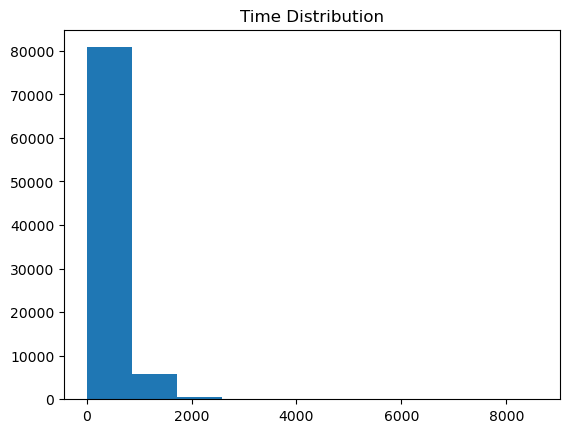

In [63]:
plt.hist(ds['time'])
plt.title('Time Distribution')
plt.show()

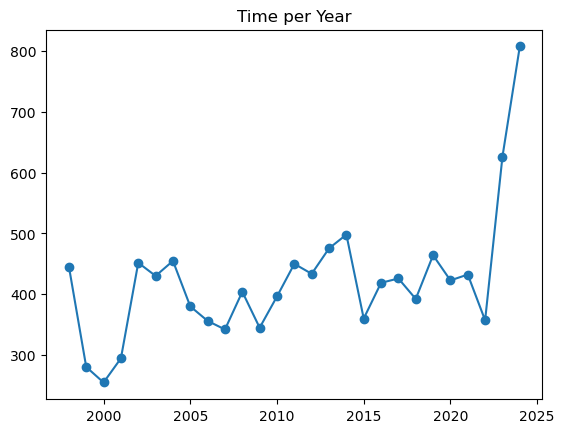

In [66]:
plt.plot(ds.groupby('year')['time'].mean(), marker = 'o')
plt.title('Time per Year')
plt.show()

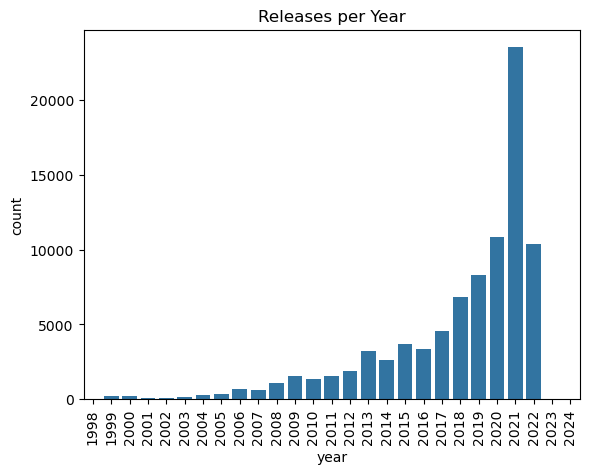

In [67]:
sns.countplot(data = ds, x = 'year')
plt.xticks(rotation = 90)
plt.title('Releases per Year')
plt.show()

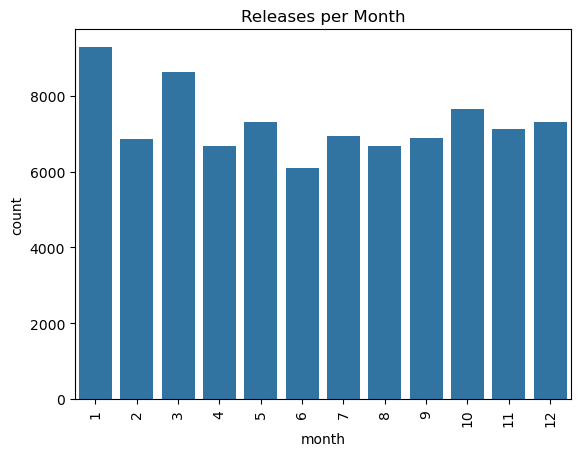

In [71]:
sns.countplot(data = ds, x = 'month')
plt.xticks(rotation = 90)
plt.title('Releases per Month')
plt.show()

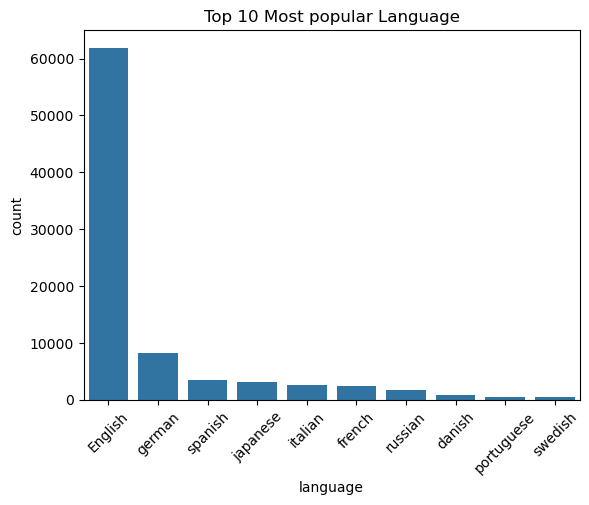

In [72]:
most_popular_language = ds['language'].value_counts().reset_index()

sns.barplot(data = most_popular_language[:10], x = 'language', y = 'count')
plt.xticks(rotation = 45)
plt.title('Top 10 Most popular Language')
plt.show()

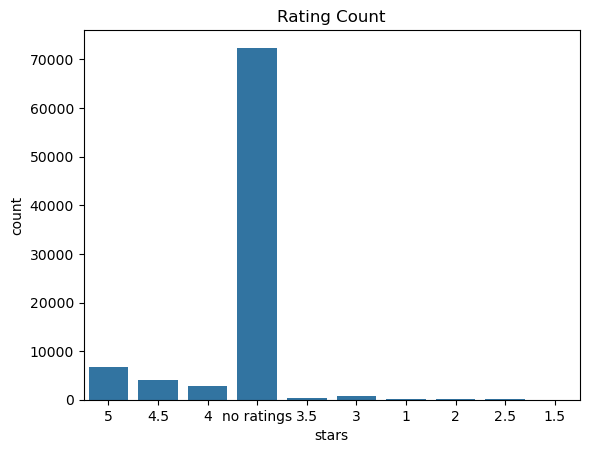

In [74]:
sns.countplot(data = ds, x = 'stars')
plt.title('Rating Count')
plt.show()

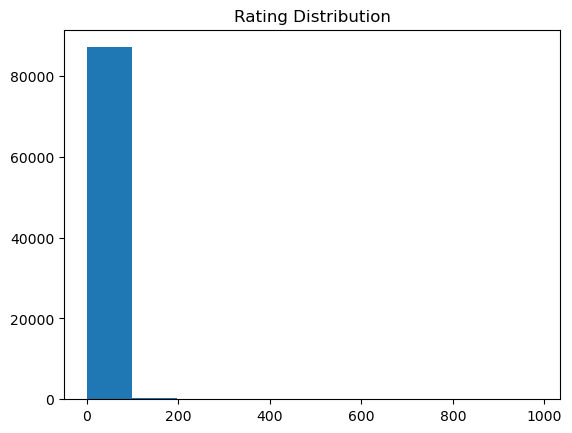

In [77]:
plt.hist(ds['ratings'])
plt.title('Rating Distribution')
plt.show()

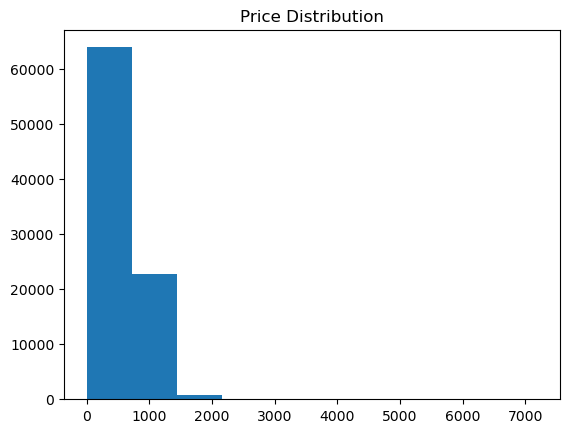

In [81]:
plt.hist(ds['price'], bins = 10)
plt.title('Price Distribution')
plt.show()